# Load Data — ENTSO-E Examples

Querying actual electricity load and forecasts from the ENTSO-E Transparency Platform.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. Actual Load — France (1 week)

In [2]:
start = "2024-06-01"
end = "2024-06-08"

df_load = client.load.actual(start, end, country="FR")
df_load.head()

,timestamp,value,quantity_unit
0,2024-05-31 22:00:00+00:00,41262.0,MAW
1,2024-05-31 23:00:00+00:00,38570.0,MAW
2,2024-06-01 00:00:00+00:00,36878.0,MAW
3,2024-06-01 01:00:00+00:00,34525.0,MAW
4,2024-06-01 02:00:00+00:00,33095.0,MAW


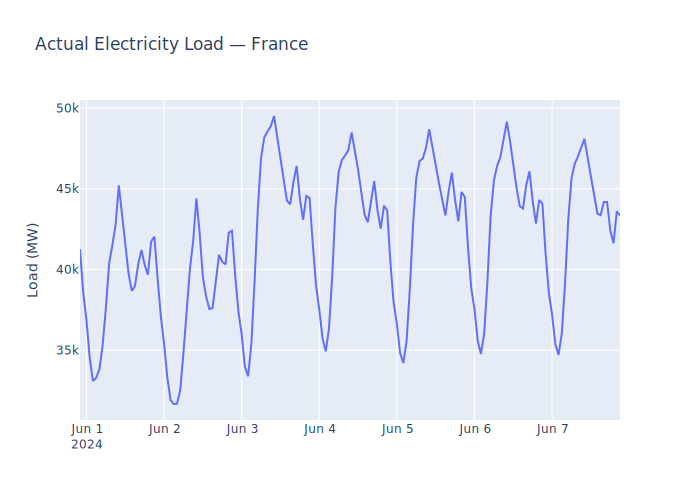

In [3]:
fig = px.line(
    df_load, x="timestamp", y="value",
    title="Actual Electricity Load — France",
    labels={"value": "Load (MW)", "timestamp": ""},
)
fig.show()

## 2. Load Forecast vs Actual

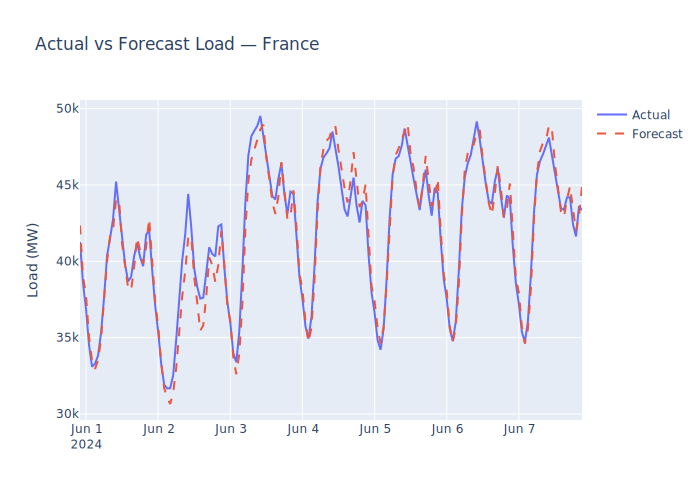

In [4]:
df_forecast = client.load.forecast(start, end, country="FR")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_load["timestamp"], y=df_load["value"],
    name="Actual", line=dict(color="#636EFA"),
))
fig.add_trace(go.Scatter(
    x=df_forecast["timestamp"], y=df_forecast["value"],
    name="Forecast", line=dict(color="#EF553B", dash="dash"),
))
fig.update_layout(
    title="Actual vs Forecast Load — France",
    yaxis_title="Load (MW)",
    xaxis_title="",
)
fig.show()

## 3. Forecast Error

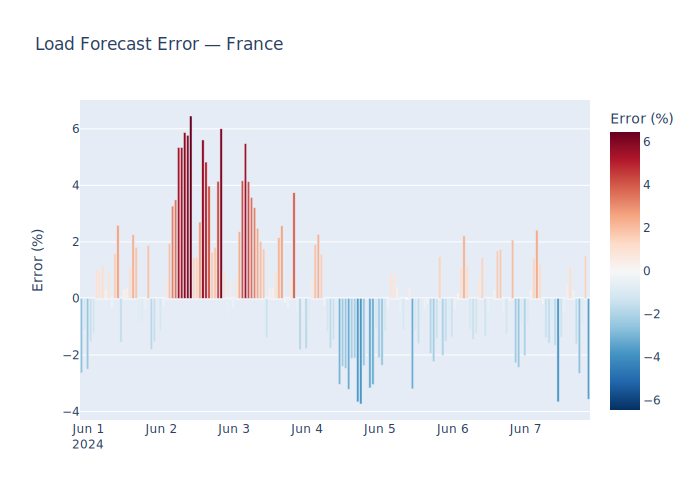

In [5]:
merged = df_load.merge(df_forecast, on="timestamp", suffixes=("_actual", "_forecast"))
merged["error"] = merged["value_actual"] - merged["value_forecast"]
merged["error_pct"] = merged["error"] / merged["value_actual"] * 100

fig = px.bar(
    merged, x="timestamp", y="error_pct",
    title="Load Forecast Error — France",
    labels={"error_pct": "Error (%)", "timestamp": ""},
    color="error_pct",
    color_continuous_scale="RdBu_r",
    color_continuous_midpoint=0,
)
fig.show()

## 4. Multi-Country Load Comparison

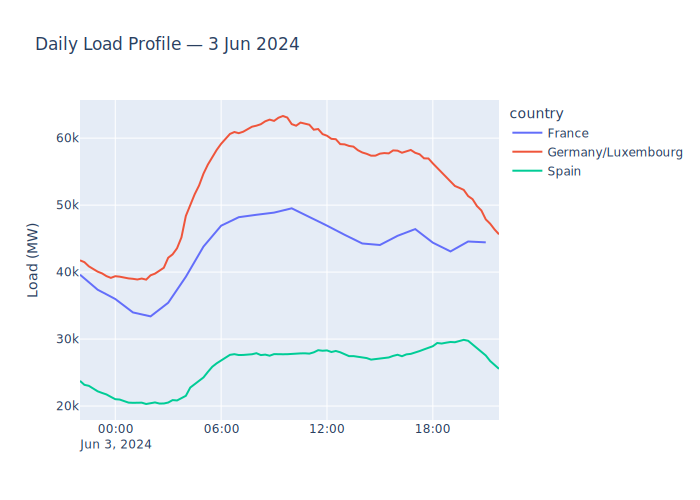

In [6]:
start = "2024-06-03"
end = "2024-06-04"

countries = ["FR", "DE_LU", "ES"]
frames = []
for code in countries:
    df = client.load.actual(start, end, country=code)
    df["country"] = country_name(code)
    frames.append(df)

df_multi = pd.concat(frames, ignore_index=True)

fig = px.line(
    df_multi, x="timestamp", y="value", color="country",
    title="Daily Load Profile — 3 Jun 2024",
    labels={"value": "Load (MW)", "timestamp": ""},
)
fig.show()